# Extracting and Viewing .bag Data

In [15]:
import bagpy
from bagpy import bagreader
import pandas as pd

# bagreader object
b = bagreader('test_1.bag')

[INFO]  Successfully created the data folder test_1.


In [16]:
# summary method
b.topic_table

,Topics,Types,Message Count,Frequency
0,/diagnostics,diagnostic_msgs/DiagnosticArray,251,0.666744
1,/mavlink/from,mavros_msgs/Mavlink,116021,486.493534
2,/mavros/battery,sensor_msgs/BatteryState,3031,8.922399
3,/mavros/global_position/compass_hdg,std_msgs/Float64,3327,9.797235
4,/mavros/global_position/global,sensor_msgs/NavSatFix,3325,9.814210
5,/mavros/global_position/local,nav_msgs/Odometry,3324,9.801745
6,/mavros/global_position/raw/fix,sensor_msgs/NavSatFix,352,0.994561
7,/mavros/global_position/raw/gps_vel,geometry_msgs/TwistStamped,351,0.994467
8,/mavros/global_position/raw/satellites,std_msgs/UInt32,352,0.994423
9,/mavros/global_position/rel_alt,std_msgs/Float64,3323,9.796022


## Extract All Topics to .csvs

In [17]:
csvfiles = [] 
# topics is dict_keys method for list of topic strings
for t in b.topics:
    # message_by_topic is method for .csv extraction
    data = b.message_by_topic(t)
    csvfiles.append(data) # track .csv filenames

In [18]:
# sample of topics
# load as pandas objects
alt = pd.read_csv("test_1/mavros-global_position-rel_alt.csv")
battery = pd.read_csv("test_1/mavros-battery.csv")
rc_out = pd.read_csv("test_1/mavros-rc-out.csv")
rc_or = pd.read_csv("test_1/mavros-rc-override.csv")

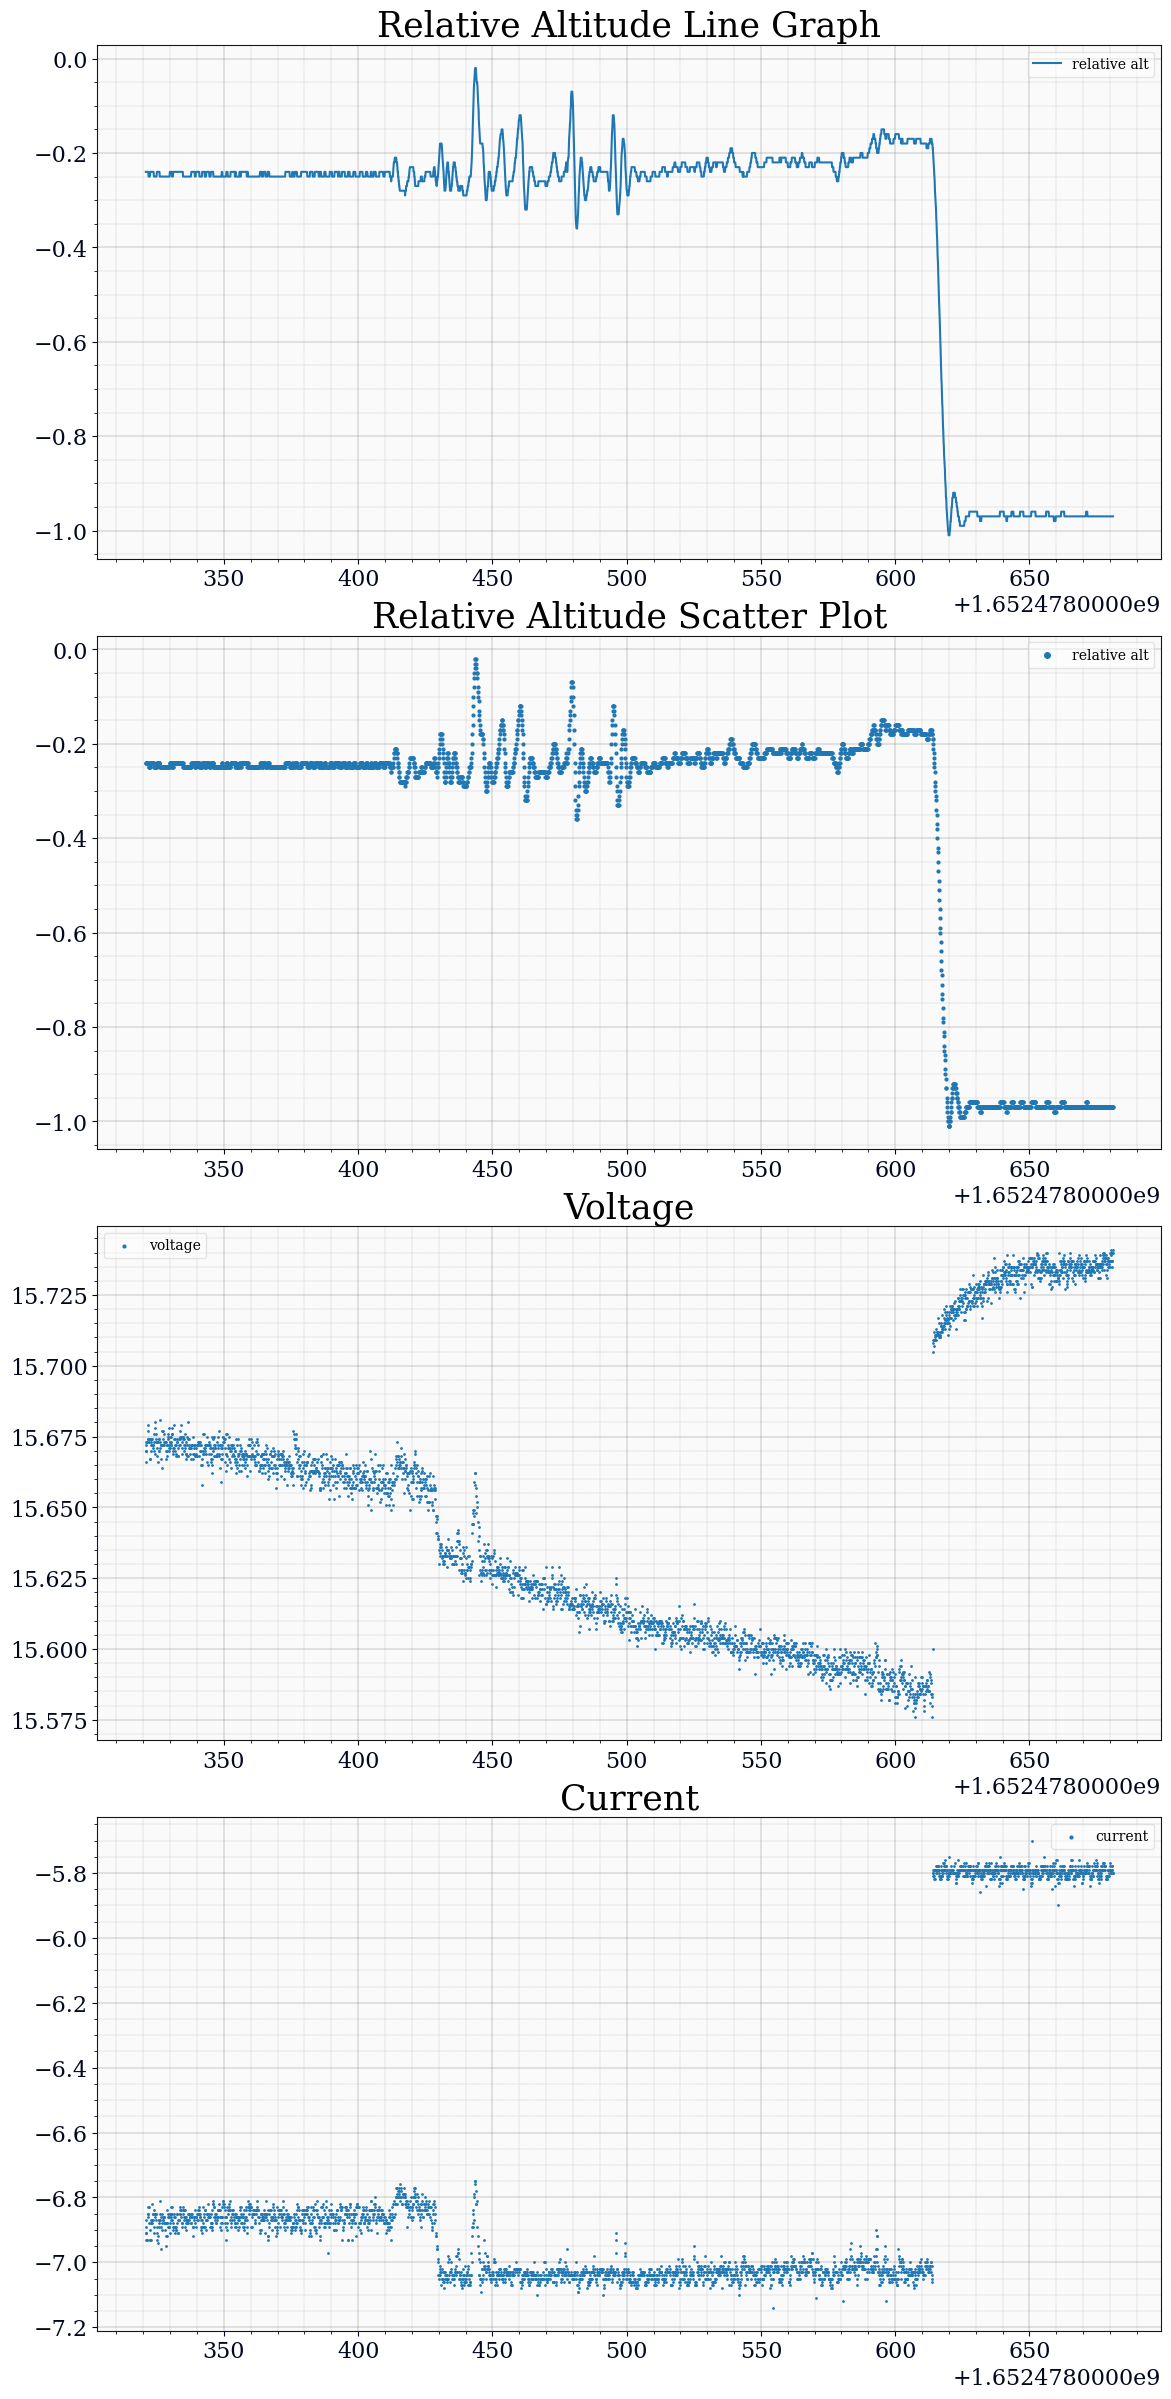

In [19]:
# sample of graphing capabilities
# essentially pandas and matplotlib
fig, ax = bagpy.create_fig(4)

ax[0].plot('Time', 'data', data=alt, label='relative alt')
ax[0].set_title('Relative Altitude Line Graph')
ax[0].legend()

# s is dot size
ax[1].scatter(x='Time', y='data', data=alt, s=4, label='relative alt')
ax[1].set_title('Relative Altitude Scatter Plot')
ax[1].legend()

ax[2].scatter(x='Time', y='voltage', data=battery, s=1, label='voltage')
ax[2].set_title('Voltage')
ax[2].legend()

ax[3].scatter(x='Time', y='current', data=battery, s=1, label='current')
ax[3].set_title('Current')
ax[3].legend()

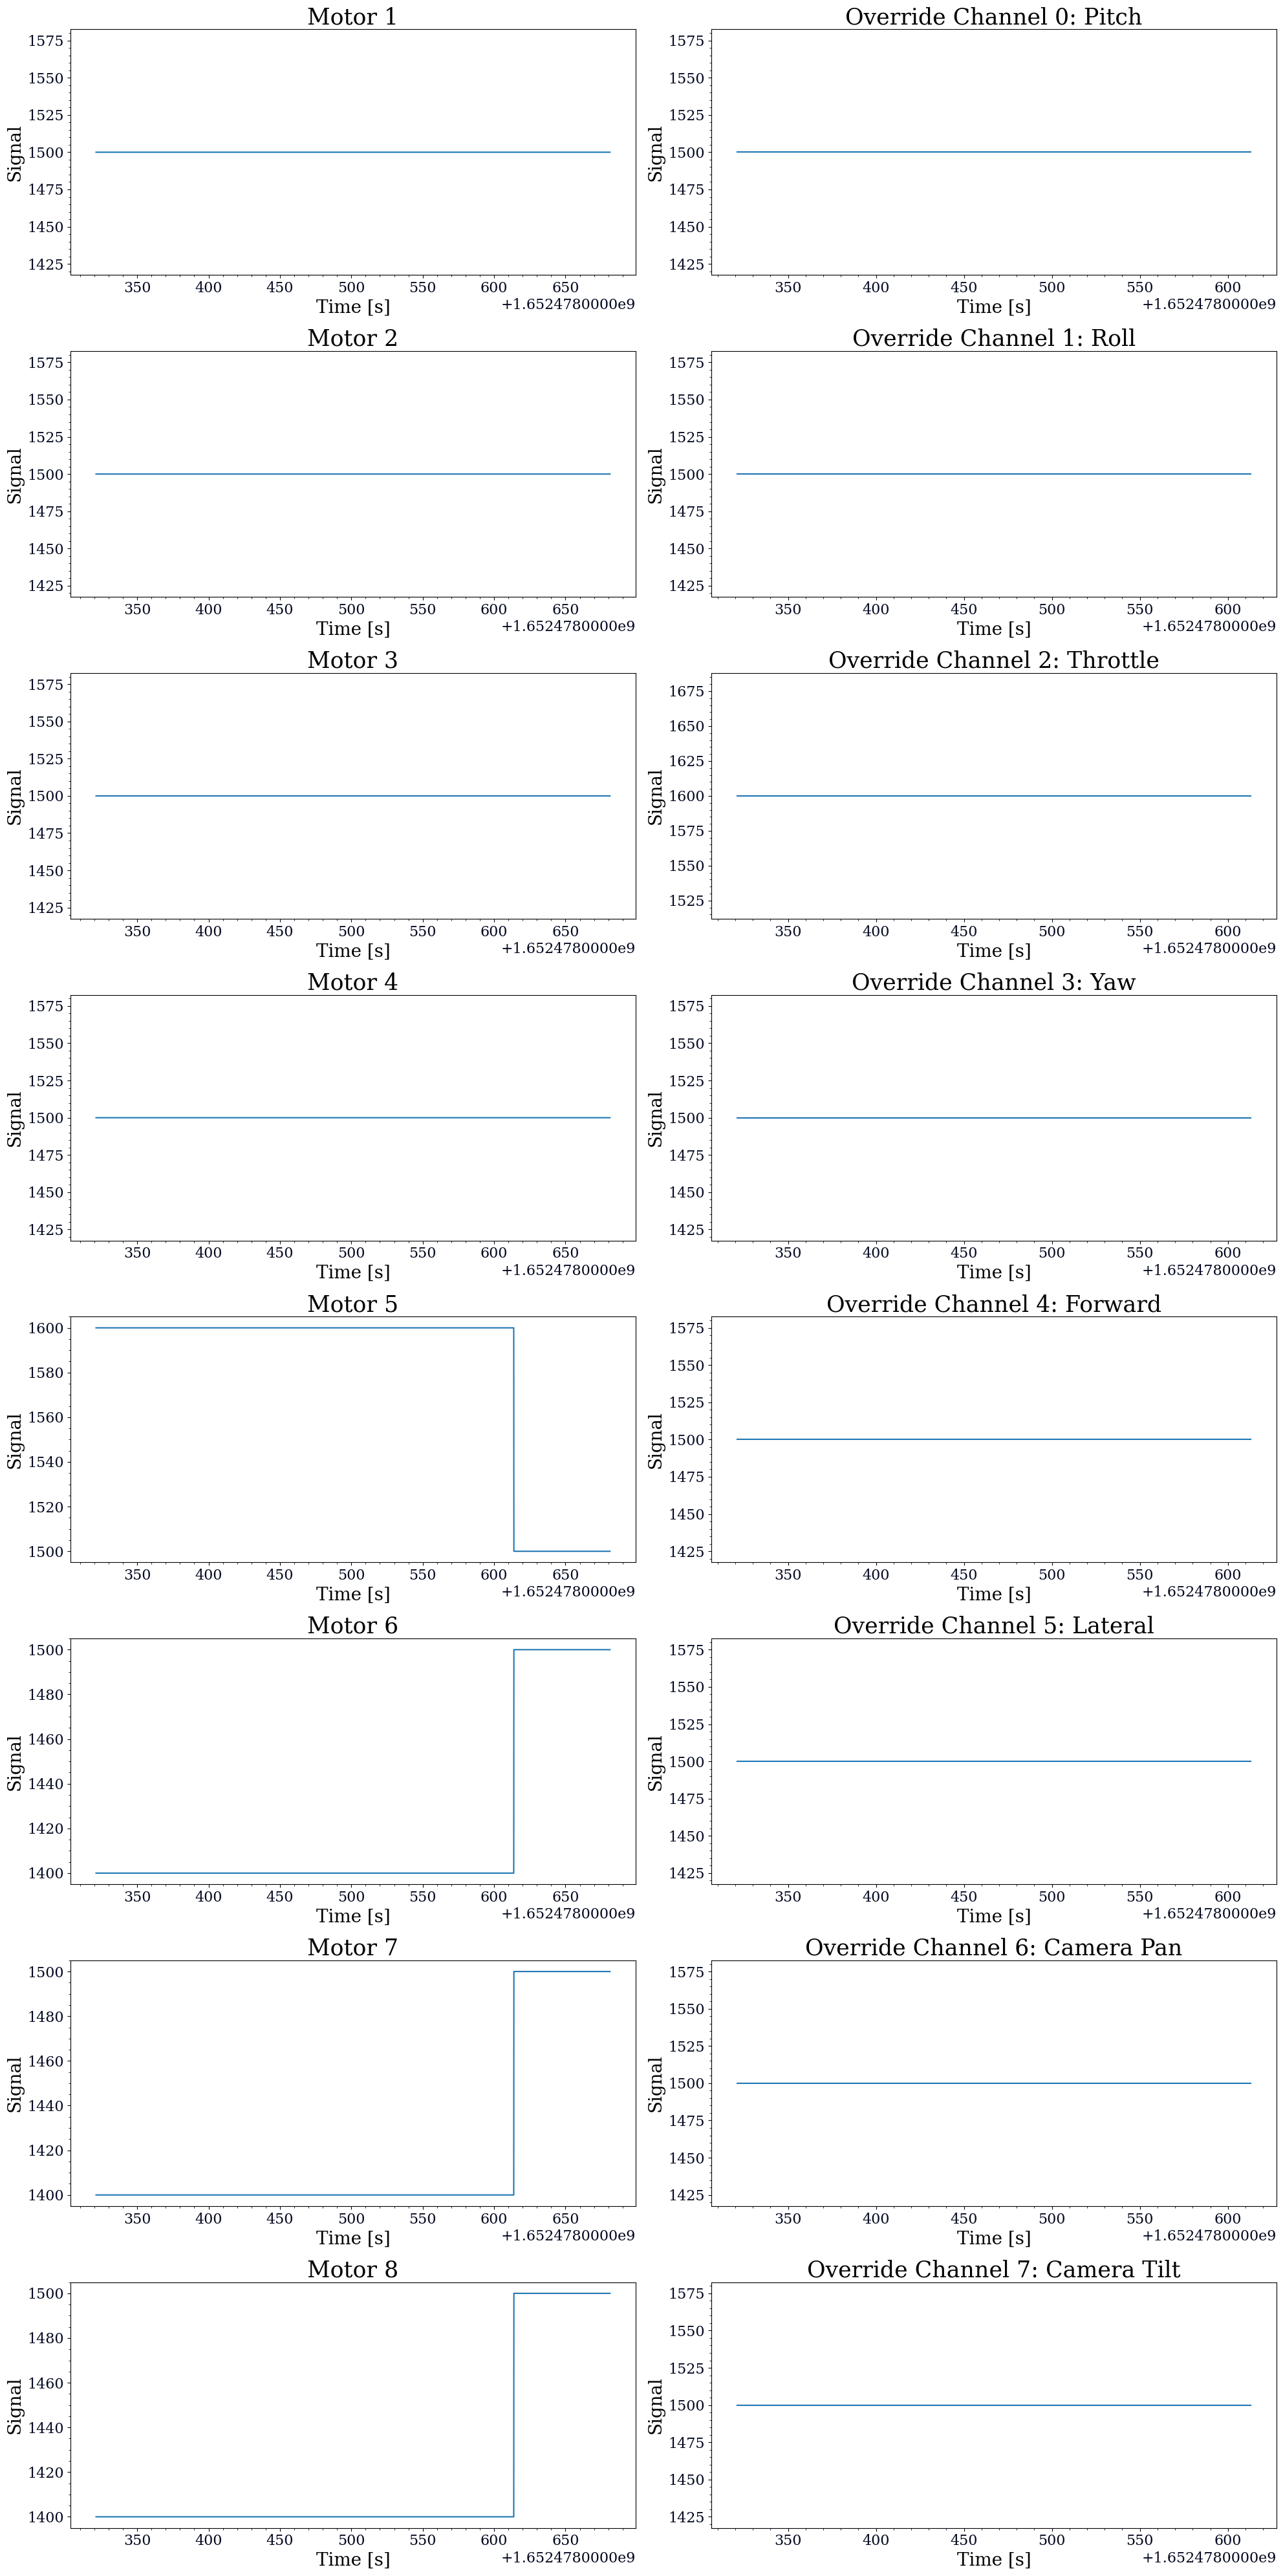

In [37]:
import matplotlib.pyplot as plt
# using matplotlib directly

plt.rcParams['figure.figsize'] = [20, 40]

fig, axs = plt.subplots(8, 2)

# https://www.ardusub.com/developers/rc-input-and-output.html
channels = [i for i in range(11)]
rc_override = ["Pitch",
               "Roll",
               "Throttle",
               "Yaw",
               "Forward",
               "Lateral",
               "Camera Pan",
               "Camera Tilt",
               "Lights 1 Level",
               "Lights 2 Level",
               "Video Switch"]
channel_dict = {k: v for k, v in zip(channels, rc_override)}

for i in range(8):
    axs[i, 0].set_title("Motor {}".format(i+1))
    axs[i, 0].plot(rc_out["Time"], rc_out["channels_{}".format(i)])
    axs[i, 1].set_title("Override Channel {}: {}".format(i, channel_dict[i]))
    axs[i, 1].plot(rc_or["Time"], rc_or["channels_{}".format(i)])
    # axs[i, 1].plot(rc_or["Time"], rc_or["channels_{}".format(i)])
for ax in axs.flat:
    ax.set(xlabel="Time [s]", ylabel="Signal")
plt.tight_layout()

# Python Unpacking
for working with .bags

http://wiki.ros.org/rosbag/Cookbook

## 1.2 Change Timestamps to Header's
useful for laggy recording

In [ ]:
import rosbag

with rosbag.Bag('outbag.bag', 'w') as outbag: # w for write
    for topic, msg, t in rosbag.Bag('input.bag').read_messages():
        # This also replaces tf timestamps under the assumption
        # that all transforms in the message share the same timestamp
        if topic == '/tf' and msg.transforms:
            outbag.write(topic, msg, msg.transforms[0].header.stamp)
        else:
            outbag.write(topic, msg, msg.header.stamp if msg._has_header else t)

## 1.3 Appending Metadata

In [ ]:
import rosbag
import rospy

with rosbag.Bag("test_1.bag", "a") as bag: # a for append
    from std_msgs.msg import String
    metadata_msg = String(data="my metadata")
    bag.write("/metadata", metadata_msg, rospy.Time(bag.get_end_time())) # append after final timestamp

## 1.4 Summary of .bag

In [ ]:
import yaml
from rosbag.bag import Bag

info_dict = yaml.safe_load(Bag("test_1.bag", "r")._get_yaml_info()) # r for read

# print("info_dict",info_dict)

for k, v in info_dict.items():
    if k != "types" and k != "topics":
        print(k,v)
# print(info_dict["topics"]) # list of dicts

for val in info_dict["topics"]:
    for k, v in val.items(): # human-readable
        if k == "topic":
            print()
        print(k+": "+str(v))
        

## 1.5 Get List of Topics and Msg Type
slower than info_dict

In [ ]:
import rosbag
bag = rosbag.Bag('test_1.bag')
# get_type_and_topic_info()[0] is topic key: hash value format
# get_type_and_topic_info()[1] is topic key: {key: float value} format
# 
topics = bag.get_type_and_topic_info()[1].keys() # keys are topics
types = []
count = []
frequencies = []
for i in range(0,len(bag.get_type_and_topic_info()[1].values())): 
    # parse as list() to make subscriptable 
    types.append(list(bag.get_type_and_topic_info()[1].values())[i][0])
    # list(bag.get_type_and_topic_info()[1].values())[i]
    # [msg_type, message_count, connections, frequency]
    count.append(list(bag.get_type_and_topic_info()[1].values())[i][1])
    frequencies.append(list(bag.get_type_and_topic_info()[1].values())[i][3])

for to, ty, co, fr in zip(topics, types, count, frequencies): # parse human-readable
    print('Topic:', to)
    print('Msg Type:', ty)
    print('Msg Count:', co)
    print('Frequency:', fr) # more sig figs than info_dict
    print()
    

## 1.6 Crop

In [ ]:
import rosbag

num_msgs = 100 # want to get first 100 msgs

with rosbag.Bag('output.bag', 'w') as outbag: # w for write
    for topic, msg, t in rosbag.Bag('test_1.bag').read_messages():
        while num_msgs:
            outbag.write(topic, msg, t)
            num_msgs -= 1